In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [30]:
df = pd.read_csv("weight-height (1).csv")
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [31]:
df.isna().sum()
df.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

In [32]:
from pandas.api.types import is_numeric_dtype

In [33]:
label = LabelEncoder()
mms = MinMaxScaler()

In [34]:
for col in df.columns:
  if is_numeric_dtype(df[col]):
    df[col] = mms.fit_transform(df[[col]])
  else:
    df[col] = label.fit_transform(df[col])

In [35]:
df.head()

,Gender,Height,Weight
0,1,0.744399,0.862415
1,1,0.548328,0.472703
2,1,0.754583,0.719657
3,1,0.662487,0.755412
4,1,0.590905,0.688360


In [47]:
x = df.drop(['Gender'], axis=1)
y = df[['Gender']]

In [50]:
x.shape , y.shape

((8555, 2), (8555, 1))

In [51]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= .2, random_state= 42)

In [52]:
tree = DecisionTreeClassifier()

In [53]:
model = tree.fit(x_train, y_train)

In [56]:
model.score(x_train, y_train)

1.0

In [57]:
y_pred = model.predict(x_test)

In [61]:
accuracy_score(y_test, y_pred)

0.8872004675628288

In [62]:
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, precision_score, recall_score,f1_score, auc 

In [66]:
y_test.shape

(1711, 1)

In [67]:
y_test.value_counts()

Gender
1         1005
0          706
Name: count, dtype: int64

In [65]:
# classification report
cla_rep = classification_report(y_test, y_pred)
print(cla_rep)

              precision    recall  f1-score   support

           0       0.87      0.85      0.86       706
           1       0.90      0.91      0.90      1005

    accuracy                           0.89      1711
   macro avg       0.88      0.88      0.88      1711
weighted avg       0.89      0.89      0.89      1711



In [68]:
confusion = confusion_matrix(y_test, y_pred)

In [69]:
confusion

array([[601, 105],
       [ 88, 917]])

In [ ]:
zeor = 0
one = 0
for i in y_pred:
  if y_pred[i] == 0:
    zeor += 1
  else:
    one += 1


In [74]:
y_test.value_counts()

Gender
1         1005
0          706
Name: count, dtype: int64

In [73]:
zeor, one

(689, 1022)

<Axes: >

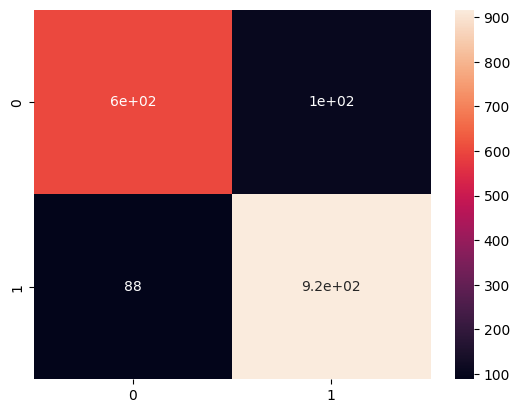

In [70]:
sns.heatmap(confusion, annot=True)

In [75]:
precision_score(y_test, y_pred)

0.8972602739726028

In [76]:
recall_score(y_test, y_pred)

0.9124378109452737

In [77]:
f1_score(y_test, y_pred)

0.9047853971386285

In [78]:
roc_auc_score(y_test, y_pred)

0.8818562992403423